In [4]:
import os

path = r"C:\Users\user\fruit-vision\data\fruit_dataset"

counts = {}
for cls in os.listdir(path):
    cls_path = os.path.join(path, cls)
    if os.path.isdir(cls_path):  # Only process folders
        counts[cls] = len(os.listdir(cls_path))

print(counts)


{'fresh_apple': 1693, 'fresh_banana': 1581, 'fresh_bitter_gourd': 327, 'fresh_capsicum': 990, 'fresh_orange': 1466, 'fresh_tomato': 981, 'stale_apple': 2342, 'stale_banana': 1467, 'stale_bitter_gourd': 357, 'stale_capsicum': 901, 'stale_orange': 1595, 'stale_tomato': 982}


(np.float64(-0.5), np.float64(457.5), np.float64(475.5), np.float64(-0.5))

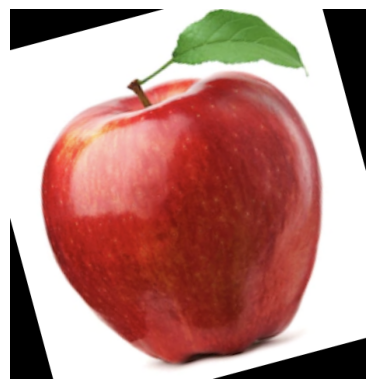

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\user\fruit-vision\data\fruit_dataset\fresh_apple\rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png")
plt.imshow(img)
plt.axis('off')


In [10]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from sklearn.metrics import classification_report, confusion_matrix
import os


In [9]:
model = mobilenet_v2(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.last_channel, 12)


In [11]:
DATA_PATH = r"C:\Users\user\fruit-vision\data\fruit_dataset"
MODEL_SAVE_PATH = r"C:\Users\user\fruit-vision\models\mobilenet_fruit_tuned.pth"

In [13]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [14]:
# 4️ DATA AUGMENTATION AND LOADERS
# Tuneable transforms: flip, brightness
weights = MobileNet_V2_Weights.DEFAULT
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3),
    weights.transforms()  # ensures normalization and resize for MobileNet
])

In [15]:
# Load full dataset
full_dataset = datasets.ImageFolder(root=DATA_PATH, transform=train_transform)

# Split dataset: 70% train, 15% val, 15% test
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

In [16]:
# DataLoaders
BATCH_SIZE = 16  # can tune 16 or 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [17]:
print("Classes:", full_dataset.classes)


Classes: ['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']


In [18]:
# 5️⃣ MODEL
# -------------------------------
num_classes = 12
model = mobilenet_v2(weights=weights)
model.classifier[1] = nn.Linear(model.last_channel, num_classes)
model = model.to(device)
